# Explorative Analysis

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

## Read data

In [2]:
path_input=os.path.join(os.getcwd(), '../data/input/dresden/')
path_output_weather = os.path.join(os.getcwd(), '../data/output/weather/')
path_output=os.path.join(os.getcwd(), '../data/output/')

In [3]:
df_full = pd.read_csv(os.path.join(path_output, "Trips.csv"),index_col=0)

In [4]:
# Activate parameter to show ALL columns from dataframe
pd.set_option('display.max_columns', None)
df_full.head(10)

,p_spot_start,b_lock_types_start,p_maintenance_start,p_bike_racks_start,p_place_type_start,p_number_start,p_uid_start,b_number_start,p_free_racks_start,b_boardcomputer_start,datetime_start,p_lng_start,b_electric_lock_start,p_bikes_start,p_booked_bikes_start,p_name_start,b_bike_type_start,p_lat_start,p_spot_end,p_maintenance_end,p_bike_racks_end,p_place_type_end,p_number_end,p_uid_end,p_free_racks_end,datetime_end,p_lng_end,p_bikes_end,p_booked_bikes_end,p_name_end,p_lat_end,air_deg,air_hum,rain_mm,rain_yn,sun_hour,wind_ms,month_start,month_end,day_start,day_end,day_of_week_start,day_of_week_end,hour_start,hour_end,day_of_year_start,day_of_year_end,season,weekend,booking_date_start,trip_duration,idle_time,24_sum,6_sum,2_sum,1_sum
0,False,analog_code_lock,False,0,12,0.0,12095573,93771,0,22532,2019-01-20 00:00:00,13.750380,False,1,0,BIKE 93771,15,51.071262,False,False,0,12,0.0,12099518,0,2019-01-20 00:28:00,13.693052,1,0,BIKE 93771,51.046234,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,28.0,0.0,265,36,19,8
1,True,analog_code_lock,False,0,0,4486.0,10299640,93576,0,0,2019-01-20 00:05:00,13.744712,False,5,0,Wohnheim Gret-Palucca.Straße / Lenneplatz,15,51.038210,False,False,0,12,0.0,12099344,0,2019-01-20 00:15:00,13.744122,1,0,BIKE 93576,51.049069,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,10.0,0.0,265,33,17,17
2,True,frame_lock,False,0,0,4483.0,10299584,93440,0,7551004130,2019-01-20 00:07:00,13.691130,True,1,0,Malterstraße (Haltestelle),0,51.042570,True,False,0,0,4458.0,4405670,0,2019-01-20 00:33:00,13.747730,3,0,Wundtstr. / Zellescher Weg,51.028370,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,26.0,0.0,265,33,17,17
3,False,analog_code_lock,False,0,12,0.0,12098234,93322,0,1265,2019-01-20 00:07:00,13.689620,False,1,0,BIKE 93322,0,51.041798,False,False,0,12,0.0,12098234,0,2019-01-20 00:09:00,13.689620,1,0,BIKE 93322,51.041798,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,2.0,0.0,265,33,17,17
4,True,analog_code_lock,False,0,0,4373.0,264575,93585,0,0,2019-01-20 00:07:00,13.741257,False,5,0,Friedensstraße/Conradstr.,15,51.071740,True,False,0,0,4373.0,264575,0,2019-01-20 00:35:00,13.741257,5,0,Friedensstraße/Conradstr.,51.071740,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,28.0,0.0,265,33,17,17
5,True,analog_code_lock,False,0,0,4310.0,45444,93660,0,0,2019-01-20 00:21:00,13.789338,False,1,0,Panometer,15,51.025741,True,False,0,0,4336.0,264532,0,2019-01-20 00:33:00,13.807733,1,0,Altenberger Platz,51.034938,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,12.0,0.0,265,33,17,17
6,False,analog_code_lock,False,0,12,0.0,12098942,93478,0,1206,2019-01-20 00:26:00,13.710755,False,1,0,BIKE 93478,0,51.028163,True,False,0,0,4491.0,10299678,0,2019-01-20 00:28:00,13.742453,1,0,Räcknitzhöhe,51.023416,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,2.0,0.0,265,33,17,17
7,True,analog_code_lock,False,0,0,4392.0,264599,93577,0,0,2019-01-20 00:29:00,13.777725,False,1,0,Mosenstraße,15,51.044740,True,False,0,0,4392.0,264599,0,2019-01-20 00:31:00,13.777725,1,0,Mosenstraße,51.044740,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,2.0,0.0,265,33,17,17
8,True,analog_code_lock,False,0,0,4403.0,38955,93258,0,1322,2019-01-20 00:31:00,13.739294,False,2,0,Palaisplatz,0,51.060231,True,False,0,0,4327.0,121771,0,2019-01-20 01:02:00,13.750328,4,0,Schauburg,51.071144,-3.4,75.0,0.0,0.0,0.0,4.4,1,1,20,20,6,6,0,1,20,20,1,True,2019-01-20 00:00:00,31.0,0.0,265,33,17,17
9,True,analog_code_lock,False,0,0,4348.0,264548,93785,0,22556,2019-01-20 00:33:00,13.722911,False,2,0,Nürnberger Ei,15,51.033767,True,False,0,0,4458.0,4405670,0,2019-01-20 00:49:00,13.747730,5,0,Wundtstr. / Zellescher Weg,51.028370,-3.4,75.0,0.0,0.0,0.0,4.4,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,16.0,0.0,265,33,17,17


## Start explorative analysis

In [5]:
# Show datatypes for every column
df_full.dtypes

p_spot_start                bool
b_lock_types_start        object
p_maintenance_start         bool
p_bike_racks_start         int64
p_place_type_start         int64
p_number_start           float64
p_uid_start                int64
b_number_start             int64
p_free_racks_start         int64
b_boardcomputer_start      int64
datetime_start            object
p_lng_start              float64
b_electric_lock_start       bool
p_bikes_start              int64
p_booked_bikes_start       int64
p_name_start              object
b_bike_type_start          int64
p_lat_start              float64
p_spot_end                  bool
p_maintenance_end           bool
p_bike_racks_end           int64
p_place_type_end           int64
p_number_end             float64
p_uid_end                  int64
p_free_racks_end           int64
datetime_end              object
p_lng_end                float64
p_bikes_end                int64
p_booked_bikes_end         int64
p_name_end                object
p_lat_end 

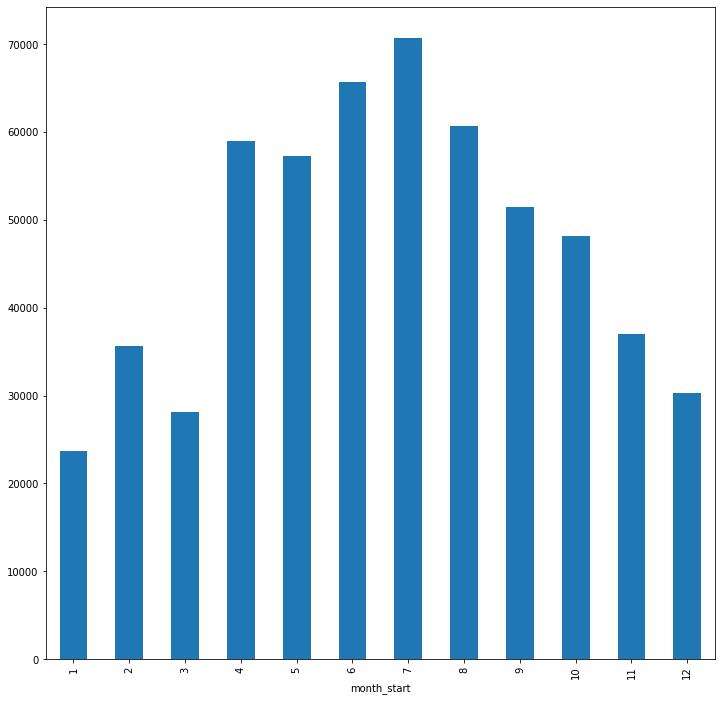

In [6]:
# plot trip number for every month
df_full.groupby(by="month_start")["datetime_start"].count().plot(kind='bar', figsize=(12,12))

In [7]:
# Compute trip number for every month
df_full[["month_start", "datetime_start"]].groupby(by="month_start").count()

,datetime_start
month_start,
1,23659
2,35632
3,28079
4,58979
5,57239
6,65675
7,70715
8,60696
9,51421


## Visualize trip number for selected months

Text(0.5, 1.0, 'January')

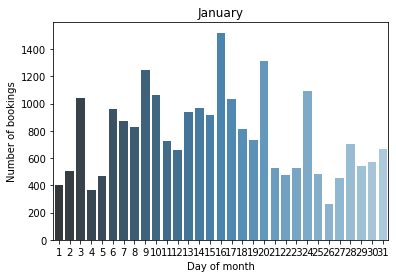

In [8]:
# plot trip number for every day in January
day_of_month_jan = df_full[df_full['month_start'] == 1]['day_start'].value_counts()
ax = sns.barplot(x=day_of_month_jan.index, y=day_of_month_jan, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='Day of month') 
ax.set_title('January')

Text(0.5, 1.0, 'March')

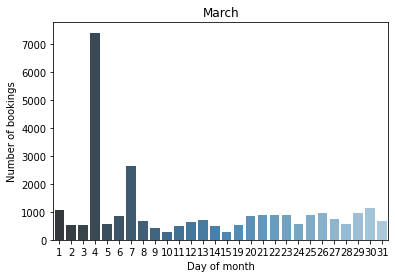

In [9]:
# plot trip number for every day in March (IMPORTANT: There are some extreme points!!! Further analysis necessary!)
day_of_month_jan = df_full[df_full['month_start'] == 3]['day_start'].value_counts()
ax = sns.barplot(x=day_of_month_jan.index, y=day_of_month_jan, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='Day of month') 
ax.set_title('March')

Text(0.5, 1.0, 'April')

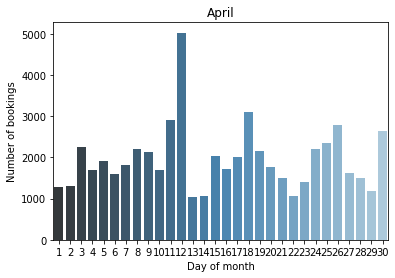

In [10]:
# plot trip number for every day in April (IMPORTANT: There are some extreme points!!! Further analysis necessary!)
day_of_month_jan = df_full[df_full['month_start'] == 4]["day_start"].value_counts()
ax = sns.barplot(x=day_of_month_jan.index, y=day_of_month_jan, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='Day of month') 
ax.set_title('April')

Text(0.5, 1.0, 'July')

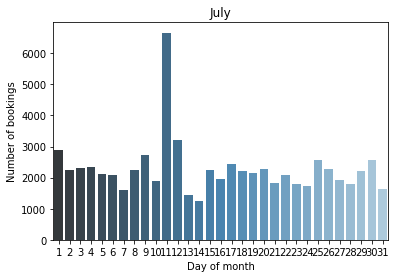

In [11]:
# plot trip number for every day in Jule (IMPORTANT: There are some extreme points!!! Further analysis necessary!)
day_of_month_jan = df_full[df_full['month_start'] == 7]['day_start'].value_counts()
ax = sns.barplot(x=day_of_month_jan.index, y=day_of_month_jan, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='Day of month') 
ax.set_title('July')

Text(0.5, 1.0, 'October')

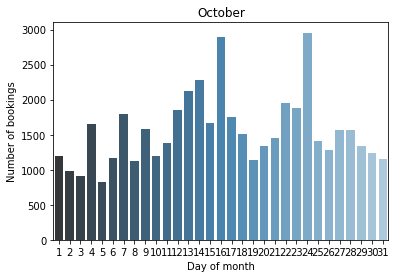

In [12]:
# plot trip number for every day in October (IMPORTANT: There are some extreme points!!! Further analysis necessary!)
day_of_month_jan = df_full[df_full['month_start'] == 10]['day_start'].value_counts()
ax = sns.barplot(x=day_of_month_jan.index, y=day_of_month_jan, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='Day of month') 
ax.set_title('October')

## Further plotting

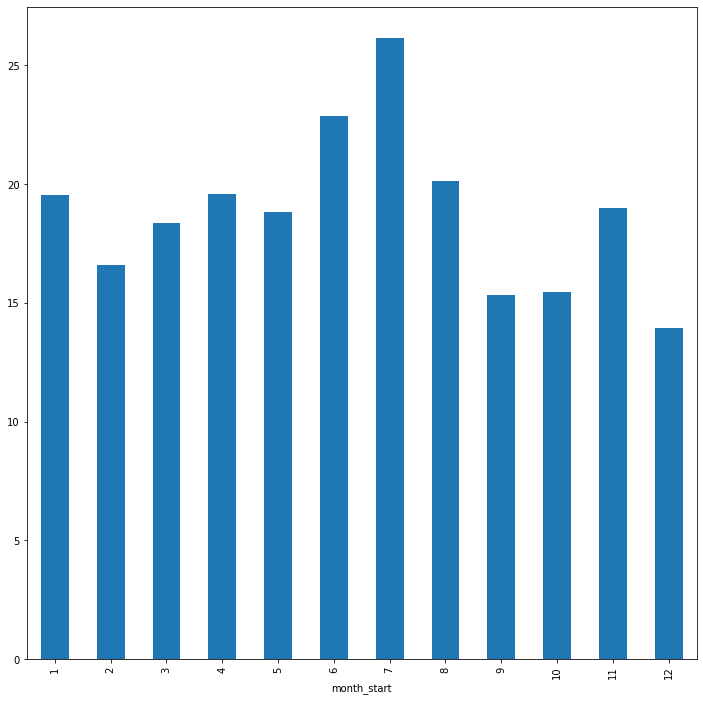

In [13]:
# plot mean trip duration for every month
df_full.groupby(by="month_start")["trip_duration"].mean().plot(kind='bar', figsize=(12,12))

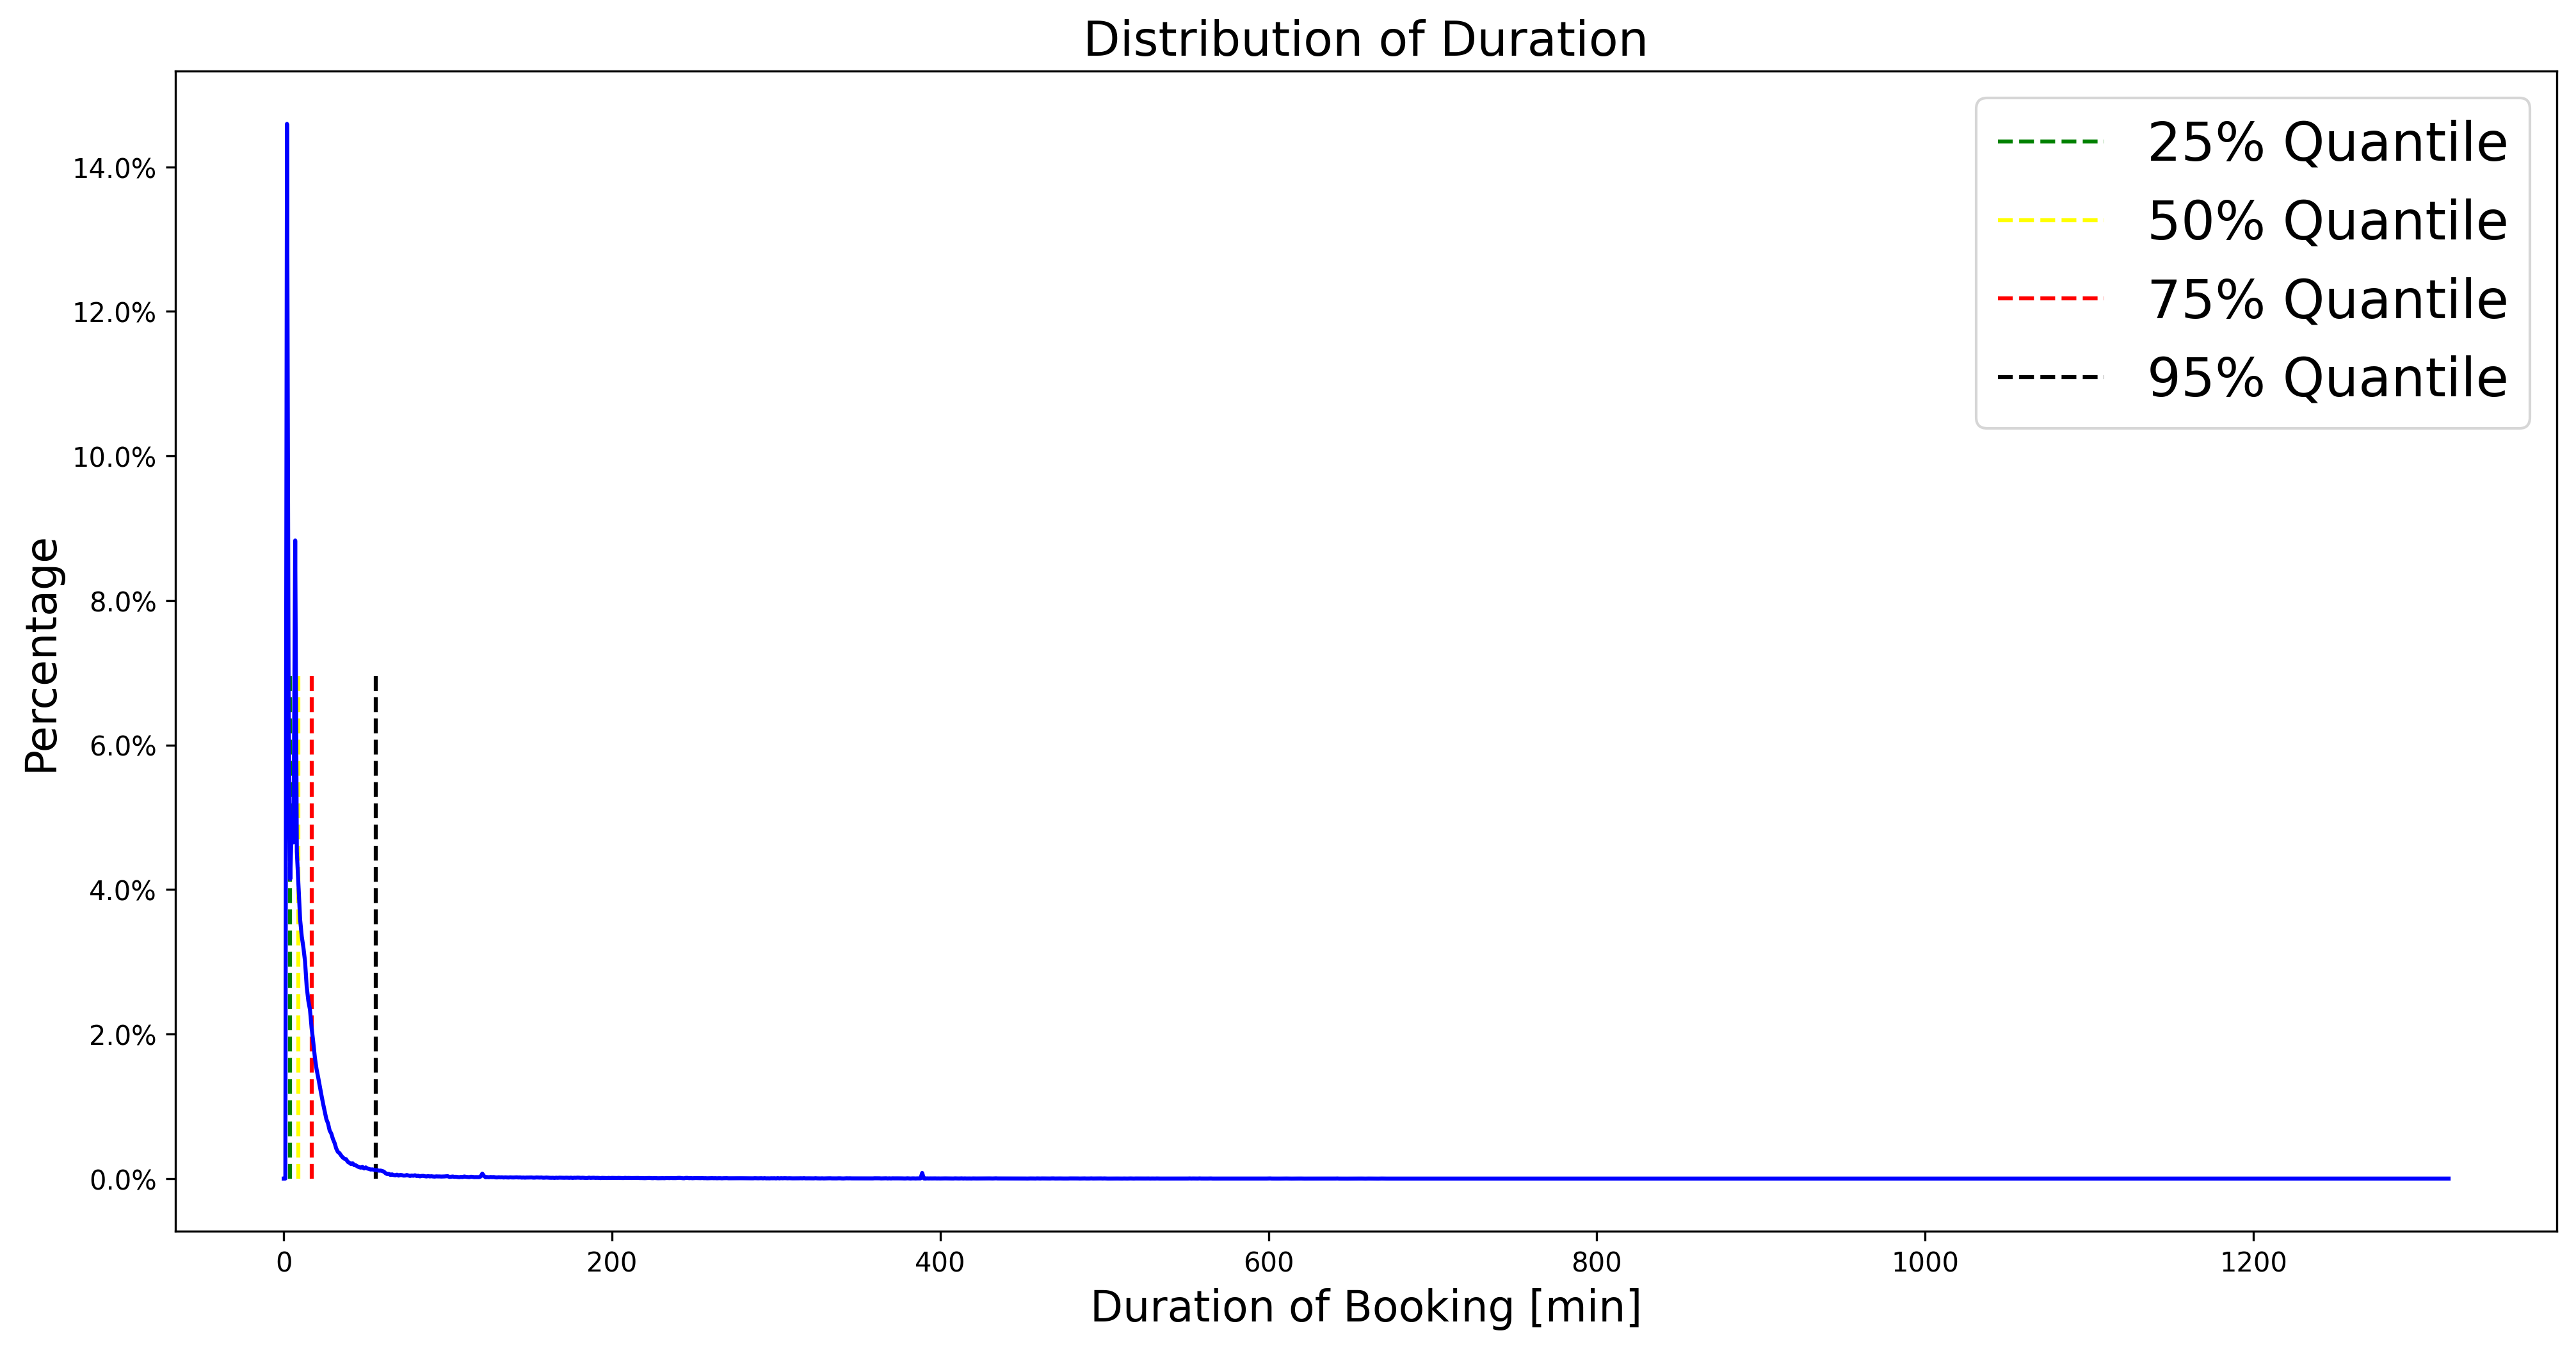

In [14]:
# plot distribution of duration and show quantile borders
# data
duration = df_full["trip_duration"]
values, base = np.histogram(duration, bins=int(duration.max()), range=(0, int(duration.max())), weights=np.ones(len(duration)) / len(duration))
quantile_25 = np.quantile(duration, 0.25)
quantile_50 = np.quantile(duration, 0.5)
quantile_75 = np.quantile(duration, 0.75)
quantile_95 = np.quantile(duration, 0.95)
# plotting
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
ax.set_xlabel("Duration of Booking [min]", fontsize=16)
ax.set_ylabel("Percentage", fontsize=16)
ax.set_title("Distribution of Duration", fontsize=18)
plt.plot(base[:-1], values, c="blue")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.vlines(quantile_25, 0, 0.07, linestyles="dashed", label="25% Quantile", colors="green")
plt.vlines(quantile_50, 0, 0.07, linestyles="dashed", label="50% Quantile", colors="yellow")
plt.vlines(quantile_75, 0, 0.07, linestyles="dashed", label="75% Quantile", colors="red")
plt.vlines(quantile_95, 0, 0.07, linestyles="dashed", label="95% Quantile")
plt.legend(loc="upper right", prop={"size": 20})
plt.show()

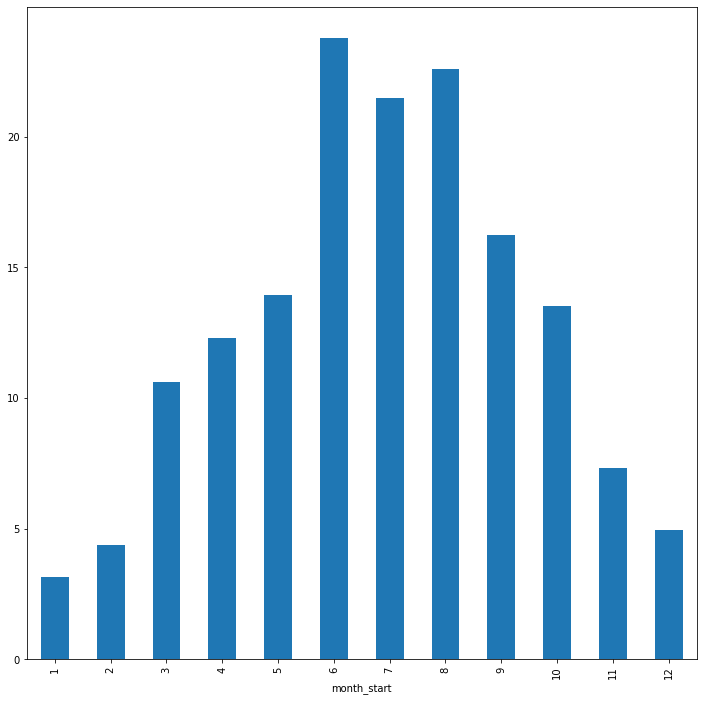

In [15]:
# plot mean air tempretature for every month (analogous for "rain_mm", "rain_yn", "sun_hour" & "wind_ms")
df_full.groupby(by="month_start")["air_deg"].mean().plot(kind='bar', figsize=(12,12))

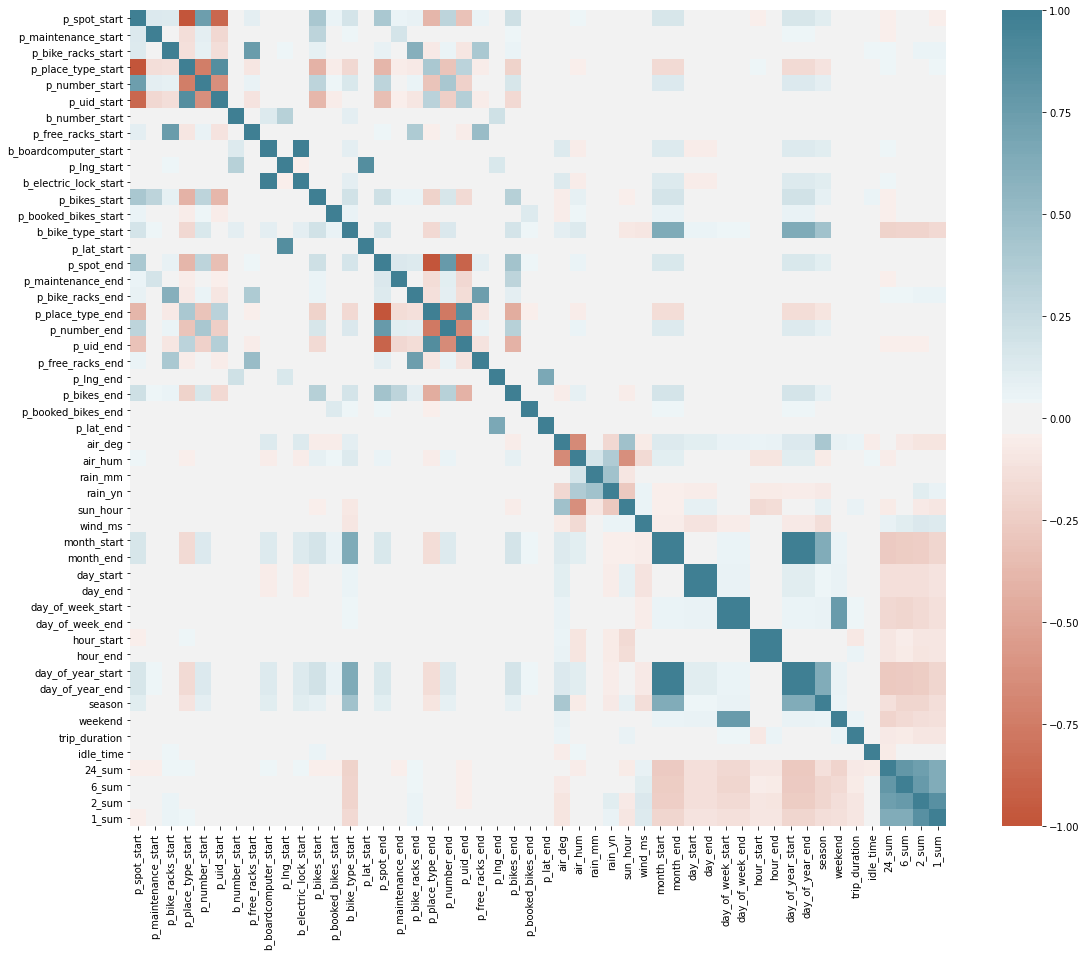

In [16]:
# compute coorelation matrix for the whole dataframe
corrMatrix = df_full.corr()
# plot coorelation matrix for the whole dataframe
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.show()